In [82]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
!pip install nbdev

In [83]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [84]:
path = untar_data(URLs.MNIST_SAMPLE)

In [85]:
Path.BASE_PATH = path

In [86]:
path.ls()

(#3) [Path('train'),Path('valid'),Path('labels.csv')]

In [87]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [88]:
threes = (path/'train'/'3').ls().sorted()

In [89]:
sevens = (path/'train'/'7').ls().sorted()

In [90]:
threes[0]

Path('train/3/10.png')

In [91]:
doc(threes[0])

In [92]:
im3 = Image.open(threes[0])

In [93]:
type(threes[0])

pathlib.PosixPath

In [94]:
array(im3)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118, 219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254, 254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 254, 254, 254, 254, 254, 238,  70,   0

In [95]:
tensor(im3)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118, 219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254, 254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 254, 254, 254, 254, 254, 238,  

In [96]:
im3

In [97]:
im3Tensor = tensor(im3)

In [98]:
im3Tensor.shape

torch.Size([28, 28])

In [99]:
df = pd.DataFrame(im3Tensor)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,42,118,219,166,118,118,6,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,103,242,254,254,254,254,254,66,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,18,232,254,254,254,254,254,238,70,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,104,244,254,224,254,254,254,141,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,207,254,210,254,254,254,34,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,84,206,254,254,254,254,41,0,0,0,0,0,0,0,0,0


In [100]:
# Prior to training any models, we will take a baseline approach of averaging the pixels for each of the 3's
# and 7's, baselines are important becuase they area a benchmark for comparison and aid with the 
# decision whether to pursue more complicated methods to achieve a sufficient solution.

In [101]:
three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(three_tensors), len(seven_tensors)

(6131, 6265)

In [102]:
three_tensors[1].shape, seven_tensors[1].shape

(torch.Size([28, 28]), torch.Size([28, 28]))

In [103]:
# We stack the tensors and convert to float to include decimal values and divide by 255 to convert
# the output from 0 - 1
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255


In [104]:
# Here we can observe the shape of the tensor
stacked_threes.shape,stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

In [105]:
# We can also view the rank of the tensor by taking the length of the shape
len(stacked_threes.shape), len(stacked_sevens.shape)

(3, 3)

In [106]:
# The rank is represents the number of dimensions, known as the axis of the tensor
stacked_threes.ndim, stacked_sevens.ndim

(3, 3)

In [107]:
# Now we take the average of the all the pixels in all the images, the shape is reduced to reflect one averaged image
mean3 = stacked_threes.mean(0)
mean3.shape

torch.Size([28, 28])

In [108]:
# Now we take the average of the all the pixels in all the images,  the shape is reduced to reflect one averaged image
mean7 = stacked_sevens.mean(0)
mean7.shape

torch.Size([28, 28])

(<AxesSubplot:>, <AxesSubplot:>)

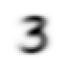

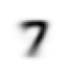

In [109]:
show_image(mean3), show_image(mean7)

torch.Size([28, 28])

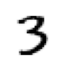

In [110]:
a_3 = stacked_threes[1]
show_image(a_3)
a_3.shape

In [111]:
# To avoid negative values, we may take two approaches:

# Option 1: Mean Absolute Difference 
dist_3_abs = (a_3 - mean3).abs().mean()

# Option 2: Root Mean Square
dist_3_sqr = pow((a_3 - mean3),2).mean().sqrt()

dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [112]:
# Now, comparing this image with a seven, we will see a number that is farther than zero, meaning this
# value is more likely to be a seven than a three

# Option 1: Mean Absolute Difference 
dist_7_abs = (a_3 - mean7).abs().mean()

# Option 2: Root Mean Square
              
dist_7_sqr = pow((a_3 - mean7),2).mean().sqrt()

dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [113]:
# These above options are conveniently macroed in Pytorch
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [114]:
three_valid_tensors = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls().sorted()])
three_valid_tensors = three_valid_tensors.float()/255
seven_valid_tensors = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls().sorted()])
seven_valid_tensors = three_valid_tensors.float()/255

three_valid_tensors.shape, seven_valid_tensors.shape

(torch.Size([1010, 28, 28]), torch.Size([1010, 28, 28]))

In [115]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

mnist_distance(a_3,mean3)

tensor(0.1114)

In [116]:
# Demonstrating the power of broadcasting!
# See here for more details: https://deeplizard.com/learn/video/6_33ulFDuCg
# It is a good rule of thumbe to utilize this over loops whenever possible for computational bandwidth
valid_3_dist = mnist_distance(three_valid_tensors,mean3)
valid_3_dist,valid_3_dist.shape

(tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260]),
 torch.Size([1010]))

In [117]:
# Here is our little boolean function to compare 3's and 7's
def is_3(x): return mnist_distance(x,mean3)<mnist_distance(x,mean7)

In [118]:
# Using a single image
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [119]:
# Another Demo using the power of broadcasting
is_3(three_valid_tensors), is_3(three_valid_tensors).float()

(tensor([ True,  True,  True,  ..., False,  True,  True]),
 tensor([1., 1., 1.,  ..., 0., 1., 1.]))

In [120]:
# Using Our ability to cast to a float, lets calculate a percentage:

percent_3 = is_3(three_valid_tensors).float().mean()

percent_7 = (1 - is_3(seven_valid_tensors).float()).mean()


percent_3, percent_7, (percent_3+percent_7)/2

(tensor(0.9168), tensor(1.), tensor(0.9584))

In [121]:
def parabola(x): return pow(x,2)

In [122]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max,100)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)
plot_function?

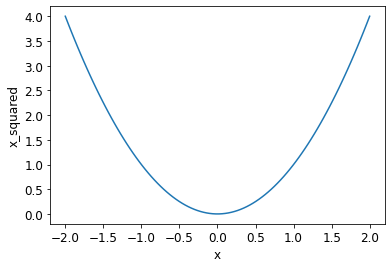

In [123]:
plot_function(parabola, 'x', 'x_squared')

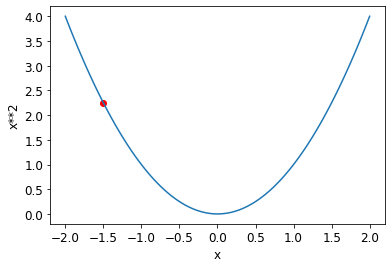

In [124]:
plot_function(parabola, 'x', 'x**2')
plt.scatter(-1.5, parabola(-1.5), color='red');

In [125]:
# We will now demonstrate how to use Pytorch libraries to calculate the gradient, using Calculus

# The requires_grad_ macro is an in place operation that modifies the tensor to track it as it goes through
# Operations in order to calculate the derivative as it goes through various operations
xt = tensor(3.).requires_grad_()

In [126]:
# Here we pass in the function that is accompanied by the 'grad_fn', which realizes that we are
# Dealing with a power funtion
yt = parabola(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [127]:
# This backward method is analagous to Backpropagation, and calculated the derivative of the passed value 'xt'
yt.backward()

In [128]:
# We call the grad attribute to display the dervative
xt.grad

tensor(6.)

In [129]:
# Vector Calculus
# we add sum to our function so it can take a vector (i.e., a rank-1 tensor), and return a scalar
def parabola(x): return (x**2).sum()

In [130]:
# Similarly..
xt = tensor([3.,5.,7.]).requires_grad_()
yt = parabola(xt)

In [131]:
yt.backward()
xt.grad

tensor([ 6., 10., 14.])

In [132]:
# Okay, we picked up some handy syntax for gradient calculation, lets try a gradient descent problem!

# We start with by setting the x - axis
time = torch.arange(0,20).float()

time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

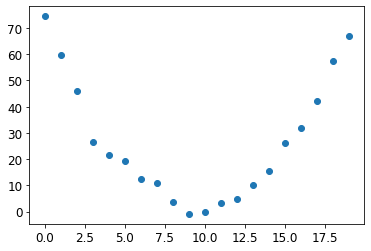

In [133]:
# We set the values through using 20 random values in a quadratic function with some added noise
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [134]:
# Taking a educated guess, we might say this follows a quadratic function, so we create a function 
# With plugin values for the constants
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [135]:
# Now we choose a loss function that would allow us to correct and improve the prediction
# For continuous data, a good choice would be mean squared error

def mse(pred, targets): return (pow((pred-targets),2).mean().sqrt())

In [136]:
# First, we initialize the parameters to random values, and tell PyTorch that we want to track their gradients, 
# using requires_grad_

params = tensor(torch.randn(3)).requires_grad_()

# Saved for later use
params_orig = params.clone()

In [137]:
# Iteration 1 
iter_1 = f(time,params)
iter_1

tensor([ 1.3525e+00, -1.6391e-01, -3.2121e+00, -7.7919e+00, -1.3903e+01, -2.1547e+01, -3.0721e+01, -4.1428e+01, -5.3666e+01, -6.7436e+01, -8.2738e+01, -9.9571e+01, -1.1794e+02, -1.3783e+02,
        -1.5926e+02, -1.8222e+02, -2.0671e+02, -2.3274e+02, -2.6029e+02, -2.8938e+02], grad_fn=<AddBackward0>)

In [138]:
# Here we have a simple function to visualize our results
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

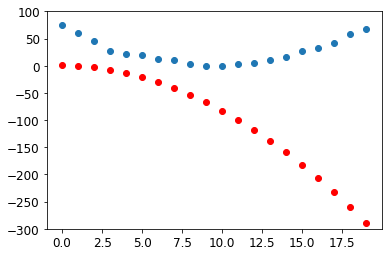

In [139]:
show_preds(iter_1)

In [140]:
# taking the loss of the first iteration
loss = mse(iter_1, speed)
loss

tensor(160.6979, grad_fn=<SqrtBackward0>)

In [141]:
# taking the gradient
loss.backward()
params.grad

tensor([-165.5151,  -10.6402,   -0.7900])

In [142]:
# lets assign an arbitrary step size for this gradient
# This is known as the learning rate
params.grad * 1e-5

tensor([-1.6552e-03, -1.0640e-04, -7.8996e-06])

In [143]:
params.grad

tensor([-165.5151,  -10.6402,   -0.7900])

In [144]:
#To calculate the gradients we call backward on the loss. 
#But this loss was itself calculated by mse, which in turn took 'iter_1' as an input, 
#which was calculated using f taking as an input params, 
#which was the object on which we originally called required_grads_
#—which is the original call that now allows us to call backward on loss. 
#This chain of function calls represents the mathematical composition of functions, 
#which enables PyTorch to use calculus's chain rule under the hood to calculate these gradients.
# Stepping the weights

# Calling the 'data' attribute prevents the gradient from being calculated in this operation as
# it is being tracked
lr = 1e-5
params.data -= lr*params.grad.data
params.grad = None

In [145]:
preds = f(time, params)
mse(preds,speed)

tensor(160.4228, grad_fn=<SqrtBackward0>)

In [146]:
# Lets clean the above steps with a function to complete one iteration of this process
def apply_step(params, prn = True): 
    preds = f(time,params)
    loss = mse(preds, speed)
    loss.backward()
    params.grad
    params.data -= lr*params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds
    
    

In [147]:
# Going the the iterations, we can see some steady improvements
for o in range(10):
    preds = apply_step(params)

160.42279052734375
160.14772033691406
159.87269592285156
159.59768676757812
159.3227081298828
159.04774475097656
158.7728271484375
158.4979248046875
158.22305297851562
157.9481964111328


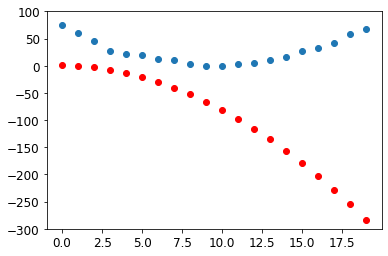

In [148]:
show_preds(preds)

In [149]:
# Lets add 1000 iterations to the process:
for o in range(1000):
    preds = apply_step(params)

157.67337036132812
157.39857482910156
157.12380981445312
156.84906005859375
156.5743408203125
156.29966735839844
156.02499389648438
155.75035095214844
155.4757537841797
155.20118713378906
154.92662048339844
154.65211486816406
154.37762451171875
154.1031494140625
153.82872009277344
153.55430603027344
153.27992248535156
153.0055694580078
152.73126220703125
152.4569549560547
152.18270874023438
151.90847778320312
151.63426208496094
151.36009216308594
151.08595275878906
150.81185913085938
150.5377655029297
150.26370239257812
149.9897003173828
149.71571350097656
149.44175720214844
149.16783142089844
148.89393615722656
148.6200714111328
148.3462371826172
148.0724334716797
147.79867553710938
147.52493286132812
147.25123596191406
146.97756958007812
146.7039337158203
146.43032836914062
146.15676879882812
145.88323974609375
145.60971069335938
145.3362579345703
145.06283569335938
144.78941345214844
144.51605224609375
144.24273681640625
143.96942138671875
143.6961669921875
143.4229278564453
143.149

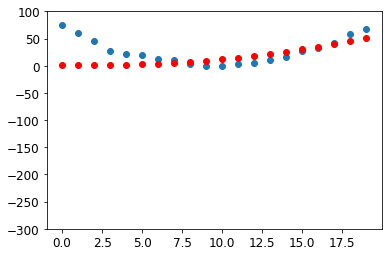

In [150]:
# The results are slowly converging!
show_preds(preds)

In [151]:
# Training THE MNIST DATASET

# We will now concatenate the stacked threes and stacked seven tensors and reshape the resulting tensor 
# such that all images are in rows and their correspnding pixels in the columns
train_x = torch.cat([stacked_threes,stacked_sevens]).view(-1,28*28)
train_x.shape

torch.Size([12396, 784])

In [152]:
# We assign boolean lables to the threes and sevens
# The 'unsqueeze' method is used to convert the labels from a vector to a matrix 
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_y.shape, train_y[10000,0]

(torch.Size([12396, 1]), tensor(0))

In [153]:
# A dataset is required to return a tuple when indexed
# Python provides a 'zip' function that can be combined with a list to achieve this 
dataset = list(zip(train_x, train_y))
x,y = dataset[0]
x.shape, y.shape

(torch.Size([784]), torch.Size([1]))

In [154]:
# We convert and stack the tensors for the validation set

valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [155]:
# We perform the same operations as above to preaper the validation dataset
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [156]:
# We randomly initialize the weights for every pixel using this function where we will pass in the pixel size in 
# one image and a subjective variance, of course we will be tracking the gradients of these values using the
# required grad function

# There are better practices for intializing weights such that we reduce the phenomenon of vanishing or exploding
# weights. See the link below for a quick video on that
# https://www.youtube.com/watch?v=qO_NLVjD6zE
def init_params(size, var=1.0): return (torch.randn(size)*var).requires_grad_()

In [157]:
weights = init_params((28*28,1))

In [158]:
# We plan on using a weights*pixels formula, given that the weight will have a value of 0 at the first pixels
# we improvise by adding an intercept/bias, this is comparable to y= w*x+b
bias = init_params(1)

In [159]:
# Calculating the prediction for one image
(train_x[0]*weights.T).sum()+bias

tensor([20.2336], grad_fn=<AddBackward0>)

In [160]:
# A brief illustration of why we took the transpose to multiple the matrices above
train_x[0].shape, (weights.T).shape, weights.shape

(torch.Size([784]), torch.Size([1, 784]), torch.Size([784, 1]))

In [161]:
# To bring this into the grander scale of using the full training set we use the '@' operator for 
# matrix multiplication
def linear1(x): return (x@weights + bias)
preds = linear1(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [162]:
# Comparing our output with the labels via checking which values have been identified as threes
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [163]:
# We can check the accuracy of these predictions, which is probably not all that great
# the 'item' method unwraps the value from a tensor to a scalar  
corrects.float().mean().item()

0.4912068545818329

In [164]:
# We have stumbled onto an interesing question, what do we use as our metric for loss?
# Using the accuracy, y = wx + b, will not be effective as the change in prediction will barely increase given
# That the gradient is the slope rise/run, which will not change significantly, or at all, if we increase the 
# step size over each epoch

# A baseline approach would be to create the following loss function:
def mnist_loss(predictions,targets): return torch.where(targets == 1, 1-predictions, predictions).mean()

# Note the where function takes in three arguments torch.where(a,b,c), this function takes looks at
# the a condition, if it is true, it will perform option b, else c
# Its important that we use the power of PyTorch library such as broadcasting and other methods
# As for loops are processed on Pythons end, which are considerably slower

In [165]:
# Testing the loss function, we see that the loss is lower for each of the predictions
# that are close to the desired outcome
trgt = tensor([1, 0, 1])
prd = tensor([0.8, 0.4, 0.7])

torch.where(trgt == 1, 1-prd, prd)



tensor([0.2000, 0.4000, 0.3000])

In [166]:
# However, we run into a flaw where this function will not work well if our predictions are negative
# So we introduce the sigmoid activation function


prd = tensor([0.8, -0.4, 0.7])

prd = prd.sigmoid()

prd

tensor([0.6900, 0.4013, 0.6682])

In [167]:
# Lets modify our loss function to include this
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [168]:
# To optimize our performance and leverage our GPU, we can declare a batch size
# Which brings us to our dataloader:

# Here is a brief example on how to do this

collection = range(15)

dl = DataLoader(collection, batch_size= 5, shuffle = True)

list(dl)


[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [169]:
# Showtime!

# Re-initialze weights and biases

weights = init_params((28*28,1))
bias = init_params(1)

In [170]:
# Recall that our dataset must be in tuple format, since we created this earlier, we will use it here

dl = DataLoader(dataset, batch_size= 256)

# lets look at the first set

xb, yb = first(dl)

#Images(dependent variable)  labels(independent variable)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [171]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [172]:
# Lets write a auxilary function to calculate the gradient of one batch

def calc_grad(xb,yb,model):
        preds = model(xb)
        loss = mnist_loss(preds,yb)
        loss.backward()
        

In [173]:
# Lets write a function to run through one epoch

# Recall that we use the data attribute since we do not want to update gradient when we apply the learning rate
# formula

# The gradient stores all previous gradients, since we want to calculate fresh new gradients we
# use the zero_ method to set all the elements in gradients tensor to zero

def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [174]:
# We can calculate the accuracy of the predictions in this auxilary function  and return a boolean for threes

# Since we are using the sigmoid function, where 0 corresponds to 0.5, we change the threshold to 0.5


def batch_accuracy(xb,yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [175]:
# Putting the bathces together

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb)for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)


In [176]:
lr = 0.01

params = weights,bias

train_epoch(linear1, lr, params)

validate_epoch(linear1)

0.2918

In [177]:
# Lets go through some more epochs

for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end = ' ')

0.2968 0.3007 0.3061 0.3116 0.3155 0.3229 0.3279 0.3304 0.3368 0.3413 0.3472 0.3536 0.3615 0.3724 0.3812 0.3877 0.398 0.4029 0.4133 0.4233 

In [178]:
# This is a proud moment, we just created a linear model from the (almost) ground level that 
# is comparable to our pixel averaging baseline

# We have achieved the right to use the easier API :D

# The next step is to automate SGD through creating an object called an optimizer

In [179]:
# The first step is to replace the linear1 function with a existing torch function
# This fucntion also initializes our weights and biases for us
linear_model = nn.Linear(28*28,1)

In [180]:
w,b = linear_model.parameters()
linear_model, w.shape, b.shape

(Linear(in_features=784, out_features=1, bias=True),
 torch.Size([1, 784]),
 torch.Size([1]))

In [181]:
# We crete the optimizer class that can use these parameters

# In short *args and **kwargs allow us to pass in an unspecifed number of arguments to a function
# For more detailed info: https://book.pythontips.com/en/latest/args_and_kwargs.html

class BasicOptim:
    def __init__ (self, params, lr): self.params,self.lr = list(params), lr
        
    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data*self.lr
            
    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None
    
    

In [182]:
# Lets instantiate the class

opt = BasicOptim(linear_model.parameters(), lr)

In [183]:
# Lets recreate our single epoch function with this new optimizer object

def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb,yb,model)
        opt.step()
        opt.zero_grad()

In [184]:
# Using our same validate_epoch function
validate_epoch(linear_model)

0.5583

In [185]:
def train_model(model,epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end = ' ')
        

In [186]:
train_model(linear_model,20)

0.8852 0.9194 0.9433 0.9526 0.9565 0.9589 0.9594 0.9599 0.9603 0.9603 0.9608 0.9608 0.9613 0.9623 0.9632 0.9642 0.9652 0.9652 0.9652 0.9652 

In [187]:
# Fastai provide the same BasicOptim class called SGD, so lets replace that accordingly
linear_model = nn.Linear(28*28, 1)

lr = 1
opt = SGD(linear_model.parameters(), lr)

train_model(linear_model,20)

0.4932 0.8349 0.8403 0.9116 0.9336 0.9472 0.9551 0.9629 0.9658 0.9678 0.9692 0.9717 0.9736 0.9746 0.9761 0.9765 0.9775 0.978 0.978 0.978 

In [188]:
# Taking a further step with refactoring this process, we can replace the train_model wiht Learner.fit
# To do this we will need to create Dataloaders object

# This class is effective as it allows us to pass in all our previous dataloaders into one Datloaders object
dls = DataLoaders(dl, valid_dl)

In [189]:
# To create a learner we will must pass in: Dataloaders, model, optimization function, the loss function
# and (optional) any metrics that we would like to print

learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func = mnist_loss, metrics=batch_accuracy )

In [190]:
# We call the fit method to train the model

learn.fit(10, lr = lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637161,0.502858,0.495584,00:00
1,0.388674,0.277241,0.736506,00:00
2,0.148070,0.152936,0.862610,00:00
3,0.067901,0.097307,0.917566,00:00
4,0.038168,0.073200,0.936212,00:00
5,0.026406,0.059612,0.950442,00:00
6,0.021474,0.050992,0.957311,00:00
7,0.019205,0.045173,0.964181,00:00
8,0.018000,0.041026,0.966143,00:00
9,0.017243,0.037934,0.968597,00:00


In [191]:
# Using Fastai, we have created a simple linear classifier

# Lets create a Basic Neural Network:

# This function takes our linear model, 
# uses the max method to convert all negative outputs to zero (ReLU function)
# and passes the values to another linear fucntion with seperates weights and biases

# The idea of using one functions output as input to the next function is called Function Composition

# Adding the ReLU activation function between the layers is what adds the non-linearity 
# This non-linearity allows each layer to act 'independently' from the next layer, creating a 
# powerful tool that we can use to solve many arbitrary problems, this is derived from a called
# The Universal Approximation Theorem

# If we had ommited ReLE from this function, we would just be left with a similar linear model
# that we we created earlier

def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = xb@w2 + b2
    return res
    

In [192]:
# Lets intialize our w1, b1, w2, b2 tensors

# We choose the subjective value of 30, which reflects a layer comprising of 30 neurons with their
# own weights and biases

# The output of this neural network (activation layer) will comprise of one neuron, which indicates
# whether we have identified the value as  three

# It is important to not that we must match the the input activations of a layer with the same number
# of the output activations of the previous layer (30 in this case)

w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

/home/slabban/anaconda3/envs/pytorch-fastai/lib/python3.9/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


(None, None)

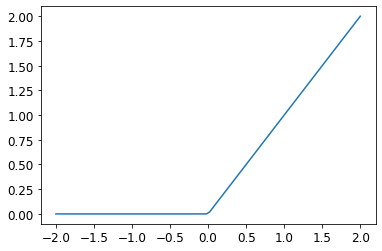

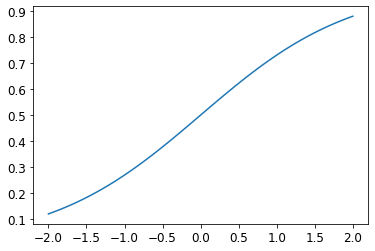

In [193]:
# A quick visual on the ReLU and Sigmoid functions
plot_function(F.relu), plot_function(F.sigmoid)

In [194]:
# Lets re-write this simple model using our wonderful libraries

# Pytorch provides a function to perform function composition called 'Sequential'

# nn.ReLU and F.ReLU are similar, but nn.ReLU is a class

simple_net = nn.Sequential(nn.Linear(28*28,30), nn.ReLU(), nn.Linear(30,1))



In [195]:
# Using a new Learner with our simple neural net model
learn = Learner(dls, simple_net, opt_func=SGD, loss_func = mnist_loss, metrics=batch_accuracy )

In [196]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.354286,0.396134,0.510304,00:00
1,0.160530,0.245401,0.780177,00:00
2,0.086674,0.119410,0.911678,00:00
3,0.055475,0.079001,0.941609,00:00
4,0.041269,0.061175,0.957311,00:00
5,0.034172,0.051345,0.964181,00:00
6,0.030189,0.045197,0.966143,00:00
7,0.027649,0.041013,0.966634,00:00
8,0.025842,0.037975,0.969087,00:00
9,0.024452,0.035660,0.969578,00:00


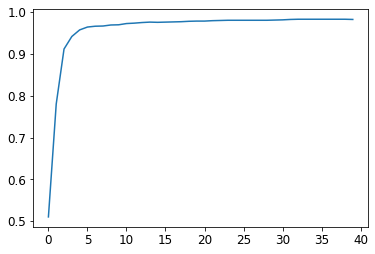

In [197]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [198]:
learn.recorder.values[-1][2]

0.98233562707901

In [199]:
m = learn.model
m

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [200]:
w,b = m[0].parameters()

(<AxesSubplot:>, <AxesSubplot:>)

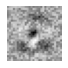

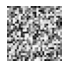

In [201]:
# We can visualize the features in the layer by reshaping the results in a chosen layer and using 
# the 'show_image' function
show_image(w[10].view(28,28)), show_image(w[29].view(28,28))

In [202]:
# Lets compare this with the resnet18 model
# We have almost 100% accuracy in one epoch vs our 40 epochs
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.074192,0.009735,0.997056,00:05


In [203]:
# Looking at the layers of this model, we can easily see that there are a lot of things going on
# that make this model so efficient
resnet_m = learn.model
resnet_m

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  